


# Анализ списка разрешений на строительство.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Загружаем данные из файла, взятого с** https://www.kaggle.com/aparnashastry/building-permit-applications-data/version/1 

Data set представляет собой набор данных о разрешениях на строительство с 1 января 2013 года по 25 февраля 2018 года. Данные содержат сведения о номерах разрешений, надзорных округах и текущем статусе заявок. 

Чем интересен этот набор, так это тем, что однозначно не поставить задачу для получения информации, которую нужно извлечь из таблицы. Этот набор полезен, к примеру, для строителей, подрядчиков, агентов по недвижимости, каждый из которых будет искать ответ на свой вопрос из определенных категорий и объема данных. 

Мне стало интересно узнать из этого набора данных, какова стоимость построек в зависимости от их расположения, применения. 









In [217]:
data = pd.read_csv('c:/Users/Novozhilova Nastya/AnacondaProjects/Machine_learning/Building_Permits.csv', sep = ',', engine = 'python')

In [218]:
type(data)

pandas.core.frame.DataFrame

Данных достаточно много, поэтому покажем малую часть.








Текущее состояние заявки - это и будет наш целевой признак

In [219]:
data['Current Status'].value_counts()

complete       97077
issued         83559
filed          12043
withdrawn       1754
cancelled       1536
expired         1370
approved         733
reinstated       563
suspend          193
revoked           50
plancheck         16
disapproved        2
incomplete         2
appeal             2
Name: Current Status, dtype: int64

 - complete - исполнено (дом построен, фасад покрашен, пожарная сигнализация установлена и тд)
 - issued - разрешение выдано
 - filed - заявка подана (на рассмотрении)
 - withdrawm - заявка отозвана (сам заявитель забрал)
 - canceled - отменена департаментом
 - expired - истек срок
 - approved - заявка утверждена
 - reinstated - восстановлена в правах
 - suspend - заморожена
 - revoked - аннулирована 
 - plancheck - проверка плана (плана проведения трубопровода, например)
 - disapproved - заявка не одобрена
 - incomplete - проект не завершен
 - appeal - апелляция/обращение
 
 
 Глубоко вникать в определение этих терминов можно долго (и это, будем честны, требует знаний того, как устроена работа в подобных департаментах). Но видно что они разделены на две основных группы: заявка одобрена и не одобрена.
 
 Ну а теперь время узнать, какие свойства можно будет использовать для предсказания судьб будущих заявок (**жирным**  выделены наиболее интересные для изучения, то есть те, что, возможно, будут **сильнее всего влиять на целевой признак**):
 
 - Permit Number - номер заявки
- Permit Type - тип заявления (в виде числа)
- **Permit Type Definition - пояснение предыдущего пунтка (соответствие описаний и чисел, рассмотрим чуть подробнее далее)**
- Permit Creation Date - дата, в которую было выдан вердикт
- Block - блок (адрес)
- Lot - еще одна составляющая адреса
- **Street Number - номер улицы**
- Street Number Suffix - суффикс номера улицы (есть не у всех)
- **Street Name - название улицы**
- Street Suffix - суффикс названия улицы
- Unit - блок здания (1, 2534, 1432)
- Unit Suffix - суффикс блока (A, B, 4C)
- **Description - причины подачи заявки, описание деталей (починка крыши, снос стен и тд)**
- Current Status - статус заявки на данный момент (подробнее только что познакомились выше)
- Current Status Date - день, в который заявка преобрела актуальный статус
- **Filed Date - день подачи заявки**
- **Issued Date - день публикования заявки (день когда ее рассмотрели)**
- Completed Date - день, когда заявка исполнена (стены покрашены, проводка проведена, в общем работа сделана)
- **First Construction Document Date - дата, на которую назначено строительство**
- **Structural Notification - соблюдение некоторых юридических правил (значение Y - yes или NaN)**
- **Number of Existing Stories - кол-во этажей в существующем здании**
- **Number of Proposed Stories - кол-во предложенных в заявке этажей**
- **Voluntary Soft-Story Retrofit - кол-во этажей, удовлетворяющее сейсмическим условиям**
- **Fire Only Permit - предоставление противопожарной защиты (значение Y - yes или NaN)**
- Permit Expiration Date - дата истечения срока разрешения на работы
- **Estimated Cost - первоначальная оценка стоимости проекта**
- **Revised Cost - пересмотренная оценка**
- **Existing Use - назначение (использование) здания (гостиница, ресторан, жилой дом и тд)**
- **Existing Units - кол-во составных частей объекта (один дом или кооператив из 30 домов, например)**
- **Proposed Use - предложенное в заявке использование**
- **Proposed Units - предложенное кол-во составных частей объекта**
- **Plansets - кол-во планов, показывающих основную задумку проекта**
- **TIDF Compliance - соответствие еще одному юридическому условию (значение Y - yes или NaN)**
- Existing Construction Type - тип конструкции на момент подачи заявки в виде числа
- **Existing Construction Type Description - описание предыдущего пункта (например, кирпич или дерево)**
- Proposed Construction Type - предложенный тип конструкции
- **Proposed Construction Type Description - описание предыдущего пунтка **
- **Site Permit - разрешение на строительную площадку**
- Supervisor District - район, к которому принадлежит объект (значение от 1 до 11)
- **Neighborhoods - Analysis Boundaries - окрестности, к которым принадлежит объект (например, Linkoln Park, South Beach, Russian Hill...)**
- Zipcode - индекс
- Location - координаты (широта, долгота)
- Record ID - ID записи в базе департамента

In [220]:
print(data[:10])

  Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   
5  201706149344            8            otc alterations permit   
6  201706300814            8            otc alterations permit   
7       M803667            8            otc alterations permit   
8       M804227            8            otc alterations permit   
9       M804767            8            otc alterations permit   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023            140                  NaN   
1           04/19/2016  0306  007            440                  NaN   
2           05/27/2016  0595  203           1647      

Видим,что данные содержат 43 колонки - 43 различных признака. 
Некоторые признаки не будем принимать во внимание, удалим их из набора.








In [221]:
data = data.drop(['Permit Number', 'Permit Type', 'Permit Creation Date',  'Block', 'Lot', 'Street Number Suffix', 'Street Suffix', 'Unit', 'Unit Suffix' , 'Current Status Date', 'Completed Date','Permit Expiration Date', 'Existing Construction Type', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Supervisor District', 'Zipcode', 'Location', 'Record ID'],axis = 1)

Вновь отобразим данные, теперь с меньшим количеством признаков.








In [222]:
data.head()

,Permit Type Definition,Street Number,Street Name,Description,Current Status,Filed Date,Issued Date,First Construction Document Date,Structural Notification,Number of Existing Stories,...,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type Description,Site Permit,Neighborhoods - Analysis Boundaries
0,sign - erect,140,Ellis,"ground fl facade: to erect illuminated, electr...",expired,05/06/2015,11/09/2015,11/09/2015,NaN,6.0,...,4000.0,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,constr type 3,NaN,Tenderloin
1,sign - erect,440,Geary,remove (e) awning and associated signs.,issued,04/19/2016,08/03/2017,08/03/2017,NaN,7.0,...,500.0,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,constr type 3,NaN,Tenderloin
2,additions alterations or repairs,1647,Pacific,installation of separating wall,withdrawn,05/27/2016,NaN,NaN,NaN,6.0,...,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,constr type 1,NaN,Russian Hill
3,otc alterations permit,1230,Pacific,repair dryrot & stucco at front of bldg.,complete,11/07/2016,07/18/2017,07/18/2017,NaN,2.0,...,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,wood frame (5),NaN,Nob Hill
4,demolitions,950,Market,demolish retail/office/commercial 3-story buil...,issued,11/28/2016,12/01/2017,11/20/2017,NaN,3.0,...,100000.0,retail sales,NaN,NaN,NaN,2.0,NaN,constr type 3,NaN,Tenderloin


In [223]:
print(data.shape)
print(data.columns)

(198900, 24)
Index(['Permit Type Definition', 'Street Number', 'Street Name', 'Description',
       'Current Status', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Estimated Cost',
       'Revised Cost', 'Existing Use', 'Existing Units', 'Proposed Use',
       'Proposed Units', 'Plansets', 'TIDF Compliance',
       'Existing Construction Type Description', 'Site Permit',
       'Neighborhoods - Analysis Boundaries'],
      dtype='object')


In [224]:
data.index

RangeIndex(start=0, stop=198900, step=1)

In [226]:
type(data['Street Name'][3])

str

In [225]:
len(data['Permit Type Definition'].unique())

8

In [227]:
data['Neighborhoods - Analysis Boundaries'].unique()

array(['Tenderloin', 'Russian Hill', 'Nob Hill', 'Potrero Hill',
       'Inner Sunset', 'Bayview Hunters Point', 'Lone Mountain/USF',
       'Haight Ashbury', 'Castro/Upper Market', 'Hayes Valley',
       'Noe Valley', 'Pacific Heights', 'Chinatown',
       'Financial District/South Beach', 'Marina', 'Mission',
       'Sunset/Parkside', 'Outer Richmond', 'Western Addition',
       'Bernal Heights', 'Inner Richmond', 'Oceanview/Merced/Ingleside',
       'Outer Mission', 'Portola', 'Mission Bay', 'Visitacion Valley',
       'Presidio Heights', 'West of Twin Peaks', 'South of Market',
       'Excelsior', 'North Beach', 'Glen Park', 'Treasure Island',
       'Twin Peaks', 'Lincoln Park', nan, 'Japantown', 'Lakeshore',
       'Seacliff', 'Golden Gate Park', 'Presidio', 'McLaren Park'],
      dtype=object)

In [228]:
data = data.drop(['Street Name', 'Description', 'Filed Date', 'First Construction Document Date', 'Voluntary Soft-Story Retrofit', 'Existing Use', 'Proposed Use', 'Plansets', 'Neighborhoods - Analysis Boundaries'  ],axis = 1)

In [229]:
data.dtypes

Permit Type Definition                     object
Street Number                               int64
Current Status                             object
Issued Date                                object
Structural Notification                    object
Number of Existing Stories                float64
Number of Proposed Stories                float64
Fire Only Permit                           object
Estimated Cost                            float64
Revised Cost                              float64
Existing Units                            float64
Proposed Units                            float64
TIDF Compliance                            object
Existing Construction Type Description     object
Site Permit                                object
dtype: object

Сократили датасет до некоторых важных признаков, с которыми будем работать. Начнем с `Current Status`. 

Заявки, которые на момент работы с данными находятся в обработке, ничем не помогут нашей модели, которая будет определять: разрешать ли стройку или нет. Также, например, если заявитель отозвал свою заявку, то никакой информации о решении департамента мы не имеем. Следовательно, подобные записи можно удалить (помечены ниже красным). 

 - complete - исполнено (дом построен, фасад покрашен, пожарная сигнализация установлена и тд)
 - issued - разрешение выдано
 - <font color='red'>filed - заявка подана </font> <font color='blue'> *(т.к. на рассмотрении)*</font>
 - <font color='red'>withdrawm - заявка отозвана </font> <font color='blue'> *(сам заявитель забрал)*</font>
 - canceled - отменена департаментом
 - <font color='red'>expired - истек срок </font> <font color='blue'> *(департамент не успел принять решение)*</font> 
 - approved - заявка утверждена
 - reinstated - восстановлена в правах
 - suspend - заморожена
 - revoked - аннулирована 
 - <font color='red'>plancheck - проверка плана (плана проведения трубопровода, например) </font> <font color='blue'> *(решение еще не принято)*</font> 
 - <font color='red'>disapproved - заявка не одобрена</font> <font color='blue'> *(заявка неправильно оформлена)*</font> 
 - incomplete - проект не завершен <font color='green'> (но, зато, одобрен)</font>
 - <font color='red'>appeal - апелляция/обращение </font> <font color='blue'> *(в принципе не имеет отношения к задаче)*</font> 


In [230]:
data['Current Status'].unique()

array(['expired', 'issued', 'withdrawn', 'complete', 'filed', 'approved',
       'reinstated', 'cancelled', 'appeal', 'suspend', 'revoked',
       'plancheck', 'disapproved', 'incomplete'], dtype=object)

In [231]:
data = data[(data['Current Status'] != 'filed') &
       (data['Current Status'] != 'withdrawn') &
       (data['Current Status'] != 'expired') &
       (data['Current Status'] != 'plancheck') &
       (data['Current Status'] != 'disapproved') &
       (data['Current Status'] != 'appeal') ]

In [234]:
data.shape

(183713, 15)

Посмотрим на процентное соотношение классов между собой:

In [233]:
data['Current Status'].value_counts()/data.shape[0]*100 

1    99.031642
0     0.968358
Name: Current Status, dtype: float64

Так как мы поставили перед собой задачу создать модель, которая принимает решение о выдаче разрешения на строительные работы, то **отобразим множество упомянутых выше классов на множество {0, 1}** где 0 - отказать в запросе, 1 - одобрить проект.
<br>
Определим следующие классы как отказ в выдаче разрешения: <font color='red'>cancelled, suspend, revoked.</font>
<br>
Определим следующие классы как одобрение проекта: <font color='green'>complete, issued, approved, reinstated, incomplete.</font>

In [232]:
data['Current Status'] = data['Current Status'].map({'cancelled': 0, 'suspend': 0, 'revoked': 0,
                                                 'complete': 1, 'issued': 1, 'approved': 1, 
                                                 'reinstated': 1, 'incomplete': 1})

In [237]:
data['Current Status'] = data['Current Status'].astype('int64')

In [239]:
print('Распределение классов в процентах:')
data['Current Status'].value_counts() /data.shape[0] * 100

Распределение классов в процентах:


1    99.031642
0     0.968358
Name: Current Status, dtype: float64

Видно, что распределение классов крайне не равномерное. В дальнейшем будет учтено.

In [236]:
data['Permit Type Definition'].unique()

array([6, 8, 4, 7, 3, 1, 2, 5], dtype=int64)

In [238]:
data['Permit Type Definition'].value_counts() 

8    169284
7     10241
6      2474
5       631
4       422
3       383
2       194
1        84
Name: Permit Type Definition, dtype: int64

- otc alterations permit - *other-the-counter*, то есть внебиржевый, частный запрос (дядя Antony захотел провести электричество)
- additions alterations or repairs - дополнения или ремонт
- sign - erect - возведение постройки
- new construction wood frame - новая конструкция с деревянной рамой (буду честен, что именно это значит - загадка. Перевел и понял как смог)
- demolitions - снос
- wall or painted sign - изменение внешнего вида стен (реклама, покраска фасада)
- new construction - новое строительство
- grade or quarry or fill or excavate - другое (оценка, копка карьера с целью добычи, насыпь/заполнение ямы, создание ямы)

In [235]:
data['Permit Type Definition'] = data['Permit Type Definition'].map({'grade or quarry or fill or excavate': 1, 'new construction': 2, 'wall or painted sign': 3, 'demolitions': 4, 'new construction wood frame': 5, 'sign - erect': 6, 'additions alterations or repairs': 7, 'otc alterations permit': 8})
data['Permit Type Definition'] = data['Permit Type Definition'].fillna(0)
data['Permit Type Definition'].unique()

array([6, 8, 4, 7, 3, 1, 2, 5], dtype=int64)

Следующий обрабатываемый признаки: `Issued Date`. Выделим год и месяц из этого признака как характеризующие признака.

In [240]:
date = pd.to_datetime(data['Issued Date'])

In [241]:
year = date.dt.year
month = date.dt.month

Убираем столбец `Issued Date`, вместо него добавляем два новых `year`, `month`.

In [242]:
data = data.drop('Issued Date', axis = 1)
data['year'] = year
data['month'] = month
data['year'] = data['year'].fillna(data['year'].max())
data['month'] = data['month'].fillna(data['month'].max())

In [243]:
data['year'].unique()

array([2017., 2018., 2015., 2014., 2016., 2013.])

In [245]:
data.head()

,Permit Type Definition,Street Number,Current Status,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Revised Cost,Existing Units,Proposed Units,TIDF Compliance,Existing Construction Type Description,Site Permit,year,month
1,6,440,1,NaN,7.0,NaN,NaN,1.0,500.0,NaN,NaN,NaN,constr type 3,NaN,2017.0,8.0
3,8,1230,1,NaN,2.0,2.0,NaN,2000.0,2000.0,1.0,1.0,NaN,wood frame (5),NaN,2017.0,7.0
4,4,950,1,NaN,3.0,NaN,NaN,100000.0,100000.0,NaN,NaN,NaN,constr type 3,NaN,2017.0,12.0
5,8,800,1,NaN,5.0,5.0,Y,4000.0,4000.0,326.0,326.0,NaN,constr type 1,NaN,2017.0,7.0
6,8,1291,1,NaN,3.0,3.0,NaN,12000.0,12000.0,5.0,5.0,NaN,wood frame (5),NaN,2017.0,6.0


In [244]:
data['Structural Notification'].unique()

array([nan, 'Y'], dtype=object)

In [249]:
data['Structural Notification'] = data['Structural Notification'].map({'Y': 1})
data['Structural Notification'] = data['Structural Notification'].fillna(0)
data['Structural Notification'].unique()

array([0., 1.])

In [248]:
data['Fire Only Permit'] = data['Fire Only Permit'].map({'Y': 1})
data['Fire Only Permit'] = data['Fire Only Permit'].fillna(0)
data['Fire Only Permit'].unique()

array([0., 1.])

In [247]:
data['TIDF Compliance'].unique()

array([0., 1.])

In [246]:
data['TIDF Compliance'] = data['TIDF Compliance'].map({'Y': 1, 'P': 0})
data['TIDF Compliance'] = data['TIDF Compliance'].fillna(0)
data['TIDF Compliance'].unique()

array([0., 1.])

In [250]:
data['Existing Construction Type Description'].unique()

array(['constr type 3', 'wood frame (5)', 'constr type 1', nan,
       'constr type 4', 'constr type 2'], dtype=object)

In [251]:
data['Existing Construction Type Description'] = data['Existing Construction Type Description'].map({'wood frame (5)': 0, 'constr type 4': 1, 'constr type 3': 2, 'constr type 3': 3, 'constr type 1': 4,})
data = data[pd.notna(data['Existing Construction Type Description'])]
print(data['Existing Construction Type Description'].unique())
print(data.shape)

[3. 0. 4. 1.]
(138669, 16)


In [252]:
np.mean(data['Existing Construction Type Description'] == 1)

0.0024590932364118873

In [253]:
data['Site Permit'] = data['Site Permit'].map({'Y': 1})
data['Site Permit'] = data['Site Permit'].fillna(0)
data['Site Permit'].unique()

array([0., 1.])

In [254]:
data.dtypes

Permit Type Definition                      int64
Street Number                               int64
Current Status                              int64
Structural Notification                   float64
Number of Existing Stories                float64
Number of Proposed Stories                float64
Fire Only Permit                          float64
Estimated Cost                            float64
Revised Cost                              float64
Existing Units                            float64
Proposed Units                            float64
TIDF Compliance                           float64
Existing Construction Type Description    float64
Site Permit                               float64
year                                      float64
month                                     float64
dtype: object

In [255]:
y = data['Current Status'].values
data = data.drop(('Current Status'), axis = 1) # выбрасываем столбец 'Current Status'

In [256]:
data.describe()

,Permit Type Definition,Street Number,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Revised Cost,Existing Units,Proposed Units,TIDF Compliance,Existing Construction Type Description,Site Permit,year,month
count,138669.000000,138669.000000,138669.000000,138650.000000,136095.000000,138669.000000,1.385440e+05,1.383430e+05,131043.000000,129322.000000,138669.000000,138669.000000,138669.000000,138669.000000,138669.000000
mean,7.890019,1087.313423,0.038386,5.818561,5.823406,0.117849,7.146028e+04,8.165321e+04,15.136499,15.078935,0.000007,0.955881,0.020098,2015.183610,6.459641
std,0.405041,1128.317727,0.192128,8.814995,8.802473,0.322430,1.168272e+06,1.023876e+06,73.699773,73.262376,0.002685,1.646956,0.140337,1.479312,3.429674
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000
25%,8.000000,222.000000,0.000000,2.000000,2.000000,0.000000,3.200000e+03,4.000000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,2014.000000,3.000000
50%,8.000000,657.000000,0.000000,3.000000,3.000000,0.000000,1.000000e+04,1.200000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,6.000000
75%,8.000000,1634.000000,0.000000,4.000000,4.000000,0.000000,3.000000e+04,4.000000e+04,4.000000,4.000000,0.000000,3.000000,0.000000,2016.000000,9.000000
max,8.000000,8400.000000,1.000000,78.000000,78.000000,1.000000,3.400000e+08,2.660615e+08,1907.000000,1911.000000,1.000000,4.000000,1.000000,2018.000000,12.000000


In [257]:
data = data.fillna(data.min(axis = 0), axis = 0)

Выведем таблицу, содержащую статистическую информацию.








In [258]:
data.describe()

,Permit Type Definition,Street Number,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Revised Cost,Existing Units,Proposed Units,TIDF Compliance,Existing Construction Type Description,Site Permit,year,month
count,138669.000000,138669.000000,138669.000000,138669.000000,138669.000000,138669.000000,1.386690e+05,1.386690e+05,138669.000000,138669.000000,138669.000000,138669.000000,138669.000000,138669.000000,138669.000000
mean,7.890019,1087.313423,0.038386,5.817764,5.715311,0.117849,7.139587e+04,8.146125e+04,14.304079,14.062537,0.000007,0.955881,0.020098,2015.183610,6.459641
std,0.405041,1128.317727,0.192128,8.814654,8.755745,0.322430,1.167747e+06,1.022679e+06,71.727620,70.851096,0.002685,1.646956,0.140337,1.479312,3.429674
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000
25%,8.000000,222.000000,0.000000,2.000000,2.000000,0.000000,3.200000e+03,4.000000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,2014.000000,3.000000
50%,8.000000,657.000000,0.000000,3.000000,3.000000,0.000000,1.000000e+04,1.200000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,6.000000
75%,8.000000,1634.000000,0.000000,4.000000,4.000000,0.000000,3.000000e+04,4.000000e+04,4.000000,4.000000,0.000000,3.000000,0.000000,2016.000000,9.000000
max,8.000000,8400.000000,1.000000,78.000000,78.000000,1.000000,3.400000e+08,2.660615e+08,1907.000000,1911.000000,1.000000,4.000000,1.000000,2018.000000,12.000000


In [259]:
data = (data - data.mean())/data.std()

In [260]:
data.describe()

,Permit Type Definition,Street Number,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Revised Cost,Existing Units,Proposed Units,TIDF Compliance,Existing Construction Type Description,Site Permit,year,month
count,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05,1.386690e+05
mean,4.771487e-16,1.204145e-17,1.885639e-17,-1.393733e-17,2.541514e-17,7.050652e-17,-8.505873e-18,-5.656918e-17,-7.583550e-18,9.018275e-18,-7.942231e-19,1.744729e-17,5.738902e-18,2.062070e-14,-9.182244e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.207288e+01,-9.627726e-01,-1.997959e-01,-6.600104e-01,-6.527499e-01,-3.655021e-01,-6.113896e-02,-7.965472e-02,-1.994222e-01,-1.984802e-01,-2.685408e-03,-5.803922e-01,-1.432142e-01,-1.476098e+00,-1.591883e+00
25%,2.715310e-01,-7.669058e-01,-1.997959e-01,-4.331156e-01,-4.243284e-01,-3.655021e-01,-5.839950e-02,-7.574343e-02,-1.854806e-01,-1.843661e-01,-2.685408e-03,-5.803922e-01,-1.432142e-01,-8.001083e-01,-1.008738e+00
50%,2.715310e-01,-3.813761e-01,-1.997959e-01,-3.196681e-01,-3.101177e-01,-3.655021e-01,-5.257632e-02,-6.792084e-02,-1.854806e-01,-1.843661e-01,-2.685408e-03,-5.803922e-01,-1.432142e-01,-1.241184e-01,-1.340189e-01
75%,2.715310e-01,4.845147e-01,-1.997959e-01,-2.062207e-01,-1.959070e-01,-3.655021e-01,-3.544933e-02,-4.054178e-02,-1.436557e-01,-1.420237e-01,-2.685408e-03,1.241150e+00,-1.432142e-01,5.518714e-01,7.406997e-01
max,2.715310e-01,6.481053e+00,5.005070e+00,8.188890e+00,8.255687e+00,2.735943e+00,2.910977e+02,2.600815e+02,2.638727e+01,2.677358e+01,3.723802e+02,1.848330e+00,6.982500e+00,1.903851e+00,1.615418e+00


In [261]:
data.head()

,Permit Type Definition,Street Number,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Fire Only Permit,Estimated Cost,Revised Cost,Existing Units,Proposed Units,TIDF Compliance,Existing Construction Type Description,Site Permit,year,month
1,-4.666235,-0.573698,-0.199796,0.134122,-0.652750,-0.365502,-0.061139,-0.079166,-0.199422,-0.198480,-0.002685,1.241150,-0.143214,1.227861,0.449127
3,0.271531,0.126460,-0.199796,-0.433116,-0.424328,-0.365502,-0.059427,-0.077699,-0.185481,-0.184366,-0.002685,-0.580392,-0.143214,1.227861,0.157554
4,-9.604001,-0.121697,-0.199796,-0.319668,-0.652750,-0.365502,0.024495,0.018128,-0.199422,-0.198480,-0.002685,1.241150,-0.143214,1.227861,1.615418
5,0.271531,-0.254639,-0.199796,-0.092773,-0.081696,2.735943,-0.057714,-0.075743,4.345549,4.402719,-0.002685,1.848330,-0.143214,1.227861,0.157554
6,0.271531,0.180522,-0.199796,-0.319668,-0.310118,-0.365502,-0.050864,-0.067921,-0.129714,-0.127910,-0.002685,-0.580392,-0.143214,1.227861,-0.134019


Диаграмма матрицы рассеивания примет следующий вид:








# X и y

In [262]:
X = data.values
print(X.shape)
print(y.shape)

(138669, 15)
(138669,)


Разобьем данные на 2 части: тестовую и обучающую, в соотношении 30% и 70%
    

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.1, test_size = 0.05, random_state = 25)


print(X_train.shape)
print(X_test.shape)

(13866, 15)
(6934, 15)


In [275]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1, algorithm='kd_tree')
knn.fit(X_train, y_train)

Wall time: 99.9 ms


In [276]:
%%time
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.0 0.022497836746466687
Wall time: 2.6 s


In [279]:
%%time
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 5, 10]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Ошибка ", best_cv_err, "Количество соседей: ", best_n_neighbors)

Ошибка  0.010529352372710243 Количество соседей:  5
Wall time: 54.9 s


In [280]:
%%time
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.009808163854031444 0.013844822613210269
Wall time: 6.02 s





# Задание №2.




Обучаем классификатор.
    

In [281]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (50,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=15, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [282]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [283]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.006346458964373287 0.015719642342082493


In [285]:
alpha_arr = np.logspace(-4, -1, 10)
print(alpha_arr)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


Подберем оптимальное значение параметра регуляризации `alpha`    

In [289]:
%%time
alpha_arr = np.logspace(-5, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 15)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Wall time: 1min


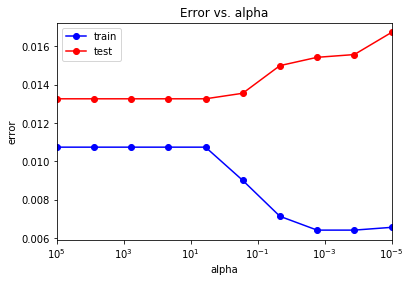

In [290]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки.
    

In [291]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.006418577816241166 0.013267955004326508


In [292]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[3.59381366e+00 4.64158883e+01 5.99484250e+02 7.74263683e+03
 1.00000000e+05]


In [293]:
alpha_opt = alpha_opt[0]

Повторим обучение.
    

In [294]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.010745708928313861
0.013267955004326508


Матрица рассогласования.
    

In [295]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[   0    0]
 [  92 6842]]


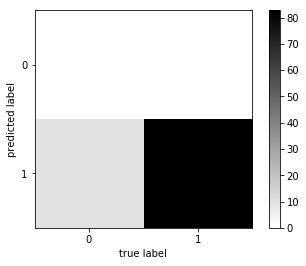

In [297]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Попробуем другие параметры.    

In [299]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (50,50), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=15, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [300]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.007428241742391461 0.01456590712431497


In [302]:
alpha_arr = np.logspace(-5, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,50), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 15)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

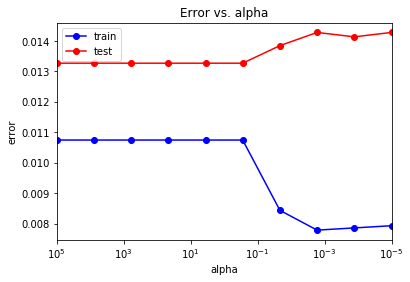

In [303]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [304]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.007788836001730853 0.013267955004326508


In [305]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]

[2.78255940e-01 3.59381366e+00 4.64158883e+01 5.99484250e+02
 7.74263683e+03 1.00000000e+05]


In [306]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (50,50),
                          solver = 'lbfgs', activation = 'logistic', random_state = 15)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.010745708928313861
0.013267955004326508


In [307]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[   0    0]
 [  92 6842]]


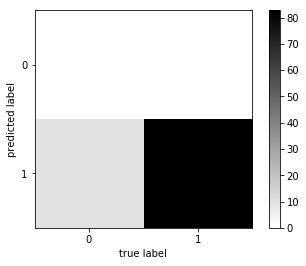

In [308]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass




# Задание №3.




# Random Forest

In [324]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.011393135275454283


In [326]:
tree_arr = np.linspace(1, 60, 20, dtype=int)
print(tree_arr)
test_err = []
train_err = []
for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  4  7 10 13 16 19 22 25 28 32 35 38 41 44 47 50 53 56 60]


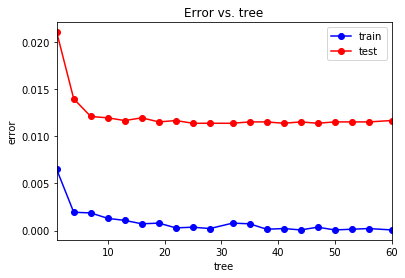

In [327]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(tree_arr), np.min(tree_arr)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.legend()
pass

# Extremely Randomized Trees

In [328]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 30).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.012979521199884627


In [330]:
tree_arr_ert = np.linspace(1, 60, 20, dtype=int)
print(tree_arr_ert)
test_err = []
train_err = []
for tree in tree_arr_ert:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree)
    ert.fit(X_train, y_train)

    y_train_pred = ert.predict(X_train)
    y_test_pred = ert.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  4  7 10 13 16 19 22 25 28 32 35 38 41 44 47 50 53 56 60]


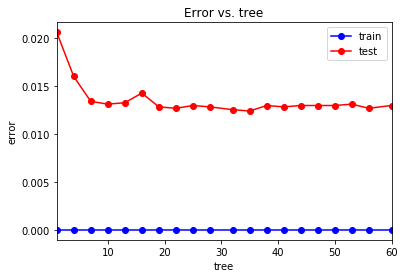

In [331]:
plt.plot(tree_arr_ert, train_err, 'b-o', label = 'train')
plt.plot(tree_arr_ert, test_err, 'r-o', label = 'test')
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.legend()
pass

# AdaBoost

In [332]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.008437905668541757 0.012546870493221805


In [357]:
import sklearn.linear_model as lm
tree_arr_ada = np.linspace(1, 20, 20, dtype='int')
print(tree_arr_ada)
test_err = []
train_err = []
log_reg = lm.LogisticRegression(solver='lbfgs')

for tree in tree_arr_ada:
    ada = ensemble.AdaBoostClassifier(n_estimators = tree, learning_rate=0.3)
    ada.fit(X_train, y_train)

    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


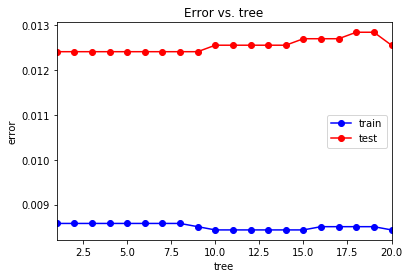

In [358]:
plt.plot(tree_arr_ada, train_err, 'b-o', label = 'train')
plt.plot(tree_arr_ada, test_err, 'r-o', label = 'test')
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.xlim([np.min(tree_arr_ada), np.max(tree_arr_ada)])
plt.legend()
pass

# GBT

In [359]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.006130102408769653 0.01485434092875685


In [360]:
tree_arr_gbt = np.linspace(1, 20, 20, dtype='int')
print(tree_arr_gbt)
test_err = []
train_err = []
for tree in tree_arr_gbt:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)

    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


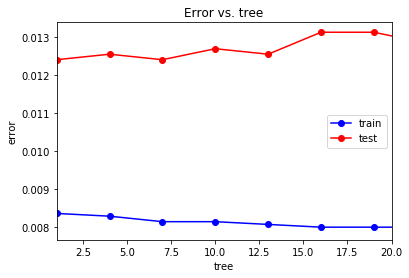

In [361]:
plt.plot(tree_arr_ert, train_err, 'b-o', label = 'train')
plt.plot(tree_arr_ert, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr_gbt), np.max(tree_arr_gbt)])
plt.title('Error vs. tree')
plt.xlabel('tree')
plt.ylabel('error')
plt.legend()
pass




# Задание №4.




In [362]:
X.shape

(138669, 15)

In [363]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 10)
X_train_cut = pca.fit_transform(X_train)
X_test_cut = pca.transform(X_test)

In [364]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 60)
rf.fit(X_train_cut, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [365]:
err_train = np.mean(y_train != rf.predict(X_train_cut))
err_test  = np.mean(y_test  != rf.predict(X_test_cut))


print ('Error train:', err_train)
print ('Error test:', err_test)

Error train: 0.00014423770373575654
Error test: 0.012546870493221805


In [370]:
from sklearn.decomposition import PCA
component_array = np.arange(1, 16, dtype=int)
test_err = []
train_err = []
oob_err = []
for components in component_array:
    pca = PCA(n_components = components)
    X_PCA_train = pca.fit_transform(X_train)
    X_PCA_test = pca.transform(X_test)
    rf = ensemble.RandomForestClassifier(n_estimators = 30, oob_score=True, bootstrap=True)
    rf.fit(X_PCA_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_PCA_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_PCA_test)))
    oob_err.append(1 - rf.oob_score_)


c:\users\novozhilova nastya\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\novozhilova nastya\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


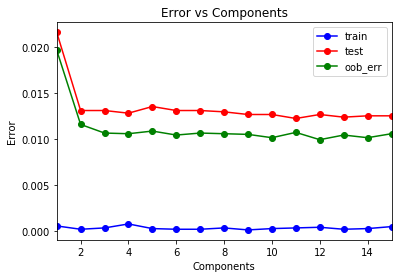

In [373]:
plt.plot(component_array, train_err, 'b-o', label = 'train')
plt.plot(component_array, test_err, 'r-o', label = 'test')
plt.plot(component_array, oob_err, 'g-o', label = 'oob_err')
plt.xlim([np.min(component_array), np.max(component_array)])
plt.title('Error vs Components')
plt.xlabel('Components')
plt.ylabel('Error')
plt.legend()
pass

In [374]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print ('Min error train:', min_train_err)
print ('Min error test:', min_test_err)

Min error train: 0.00014423770373575654
Min error test: 0.012258436688779925


In [375]:
component_opt = component_array[test_err == min_test_err]
component_opt = component_opt[0]
print(component_opt)

11
